# DS7333 Superconductivity Data Case Study
#### 01/31/2021
#### Tom Gianelle, Michael Weatherford and Yang Zhang

# Table of contents
1. [Data](#data)
2. [Explortory Data Analysis](#eda)
3. [Feature Importance](#fi)
4. [Linear Regression](#lr)
5. [Non-linear Regression](#nlr)
6. [Final Model](#final)

## Data <a name="data"></a>

In [222]:
# required libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnings
warnings.filterwarnings("ignore")

# For multiple line outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [252]:
# read in CSV
train = pd.read_csv('./train.csv',header =[0])
train.shape

(21263, 82)

In [253]:
train_org = train

In [254]:
#Pop out the temperature information from the Data
train_temp = train.pop('critical_temp')

In [174]:
# read in CSV
unique = pd.read_csv('./unique_m.csv',header =[0])
unique.shape

(21263, 88)

In [178]:
comb = pd.concat([train, unique],axis=1)
comb

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.00,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.00,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.00,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.00,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.00,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,0.0,0.0,0.0,0.0,0.0,0,0,0,2.44,Tm0.84Lu0.16Fe3Si5
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,0.0,0.0,1.0,0.0,0.0,0,0,0,122.10,Tl1Ba2Ca3Cu4O11
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.98,Nb0.8Pd0.2
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.84,Nb0.69Pd0.31


In [180]:
comb_temp = comb.pop('critical_temp')
comb.shape

(21263, 168)

In [182]:
comb.pop('material')

0               Ba0.2La1.8Cu1O4
1        Ba0.1La1.9Ag0.1Cu0.9O4
2               Ba0.1La1.9Cu1O4
3             Ba0.15La1.85Cu1O4
4               Ba0.3La1.7Cu1O4
                  ...          
21258        Tm0.84Lu0.16Fe3Si5
21259           Tl1Ba2Ca3Cu4O11
21260                Nb0.8Pd0.2
21261              Nb0.69Pd0.31
21262             Fe1Se0.2Te0.8
Name: material, Length: 21263, dtype: object

## EDA <a name="eda"></a>

### Data Description

| Variable | Units | Description| 
|:---|:---|:---|
| Atomic Mass|  Atomic mass units (AMU) | Total proton and neutron rest masses
| First Ionization Energy|  Kilo-Joules per mole (kJ/mol) | Energy required to remove a valence electron
| Atomic Radius | Picometer (pm) | Calculated atomic radius
| Density | Kilograms per meters cubed (kg/m3) | Density at standard temperature and pressure
| Electron Affinity | Kilo-Joules per mole (kJ/mol) | Energy required to add an electron to a neutral atom
| Fusion Heat | Kilo-Joules per mole (kJ/mol) | Energy to change from solid to liquid without temperature change
| Thermal Conductivity | Watts per meter-Kelvin (W/(m K)) | Thermal conductivity coefficient κ
| Valence | No units | Typical number of chemical bonds formed by the element

In [227]:
train_temp.describe()

count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

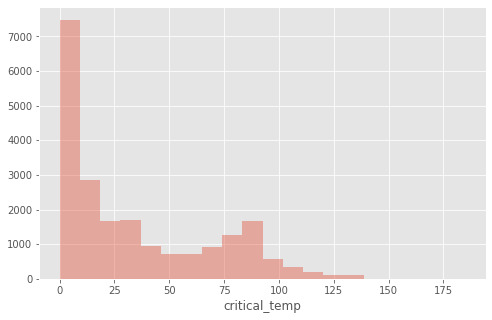

In [255]:
# Histogram of target variable: critial_temp
f, ax = plt.subplots(figsize=(8, 5))
sns.distplot(train_temp, bins=20, kde=False,ax=ax)
plt.show()

In [19]:
train.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

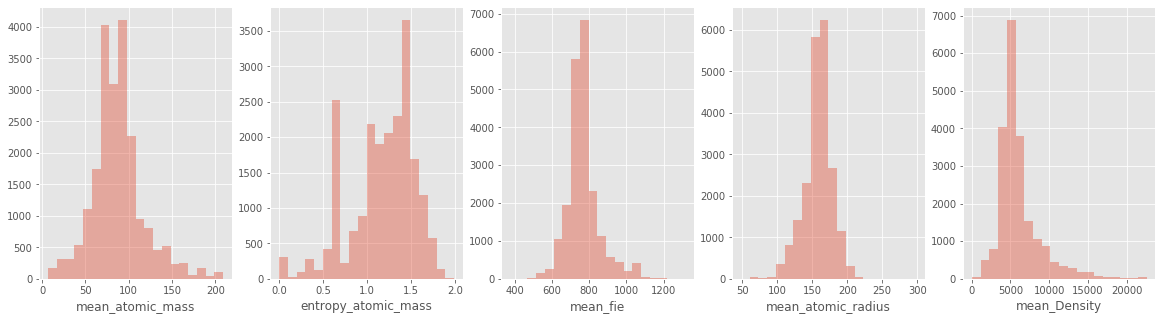

In [226]:
f, ax = plt.subplots(1,5,figsize=(20, 5))
sns.distplot(train["mean_atomic_mass"], bins=20, kde=False, ax=ax[0])
sns.distplot(train["entropy_atomic_mass"], bins=20, kde=False, ax=ax[1])
sns.distplot(train["mean_fie"], bins=20, kde=False, ax=ax[2])
sns.distplot(train["mean_atomic_radius"], bins=20, kde=False, ax=ax[3])
sns.distplot(train["mean_Density"], bins=20, kde=False, ax=ax[4])
plt.show()

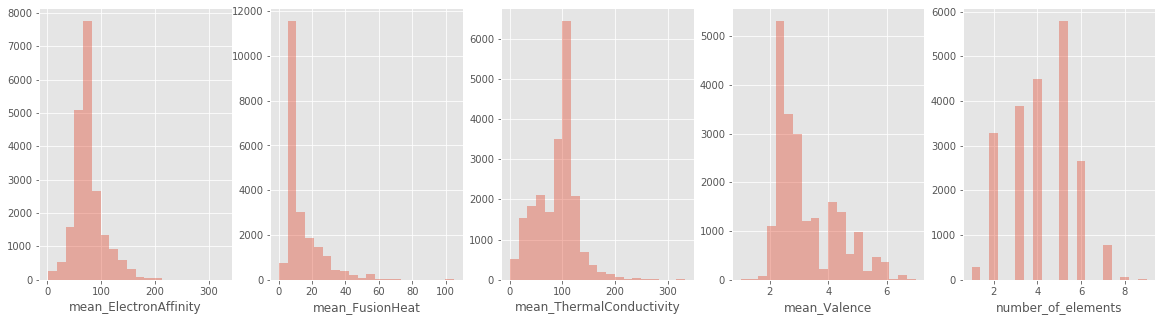

In [225]:
f, ax = plt.subplots(1,5,figsize=(20, 5))
sns.distplot(train["mean_ElectronAffinity"], bins=20, kde=False, ax=ax[0])
sns.distplot(train["mean_FusionHeat"], bins=20, kde=False, ax=ax[1])
sns.distplot(train["mean_ThermalConductivity"], bins=20, kde=False, ax=ax[2])
sns.distplot(train["mean_Valence"], bins=20, kde=False, ax=ax[3])
sns.distplot(train["number_of_elements"], bins=20, kde=False, ax=ax[4])
plt.show()

,mean_atomic_mass,entropy_atomic_mass,mean_fie,mean_atomic_radius,mean_Density,mean_ElectronAffinity,mean_FusionHeat,mean_ThermalConductivity,mean_Valence
9842,97.232400,0.797701,845.233333,166.000000,8041.143000,99.500000,11.137333,48.342193,3.000000
9837,76.517718,1.197273,787.050000,151.750000,4434.357250,79.607500,6.905500,112.006645,2.250000
2709,76.444563,1.199541,794.000000,164.500000,4235.857250,77.237500,8.180500,108.756645,2.250000
4603,111.515680,1.409388,821.340000,160.400000,6538.885800,66.170000,5.822400,87.465316,2.400000
9582,88.936744,1.445824,743.420000,170.600000,4617.885800,71.690000,7.804400,89.605316,2.400000
...,...,...,...,...,...,...,...,...,...
10730,147.950780,1.372004,680.200000,190.000000,10518.250000,78.325000,15.975000,34.250000,4.500000
20610,31.715013,1.081742,650.866667,141.000000,2193.333333,60.990000,23.146667,195.000000,3.000000
1096,106.573410,1.814336,679.685714,181.857143,5212.489857,62.411429,7.460286,69.718083,2.571429
18794,96.579333,1.087085,727.733333,149.666667,7469.666667,100.100000,14.886667,73.840000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E45F1E8388>,
      dtype=object)

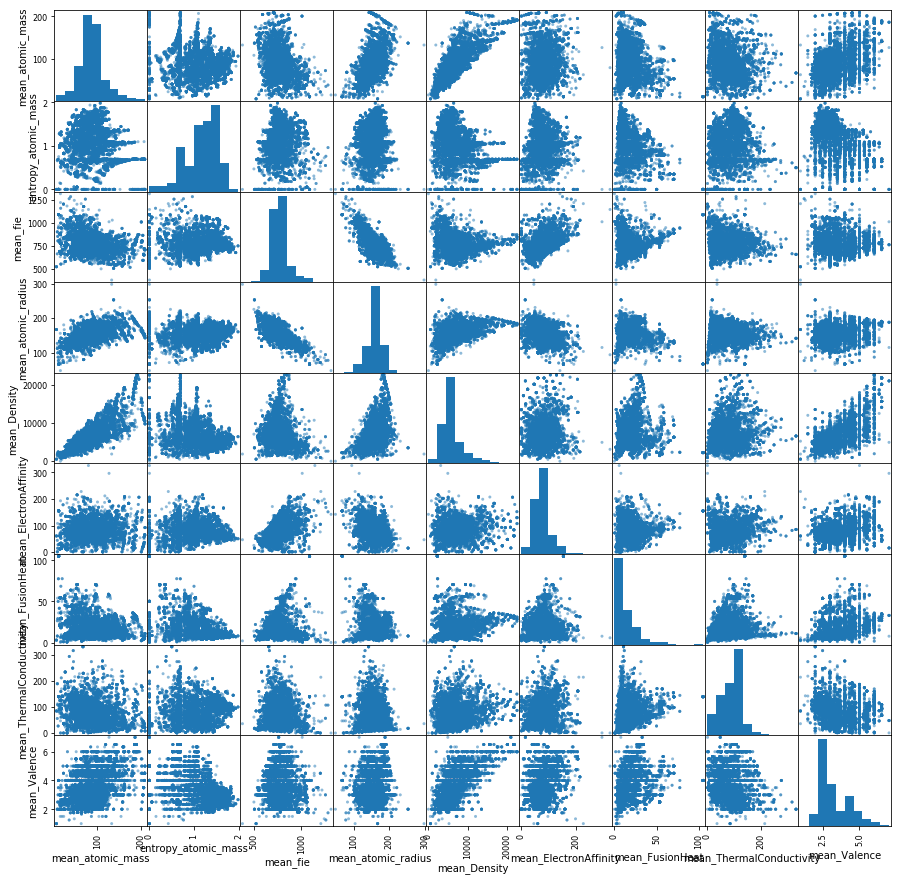

In [23]:
# create a new dataframe 
train_pick = train[['mean_atomic_mass', 'entropy_atomic_mass', 'mean_fie',
                     'mean_atomic_radius','mean_Density', 'mean_ElectronAffinity','mean_FusionHeat','mean_ThermalConductivity','mean_Valence']]

train_pick.sample(1000)

pd.plotting.scatter_matrix(train_pick, 
                           figsize=(15,15))

plt.show()

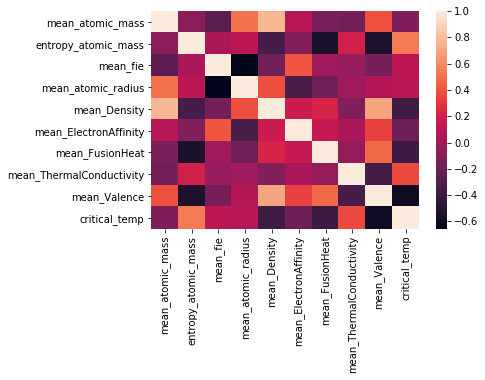

In [35]:
# create a new dataframe 
train_org_pick = train_org[['mean_atomic_mass', 'entropy_atomic_mass', 'mean_fie',
                     'mean_atomic_radius','mean_Density', 'mean_ElectronAffinity','mean_FusionHeat','mean_ThermalConductivity','mean_Valence','critical_temp']]
samp = train_org_pick.sample(1000)


corr = samp.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


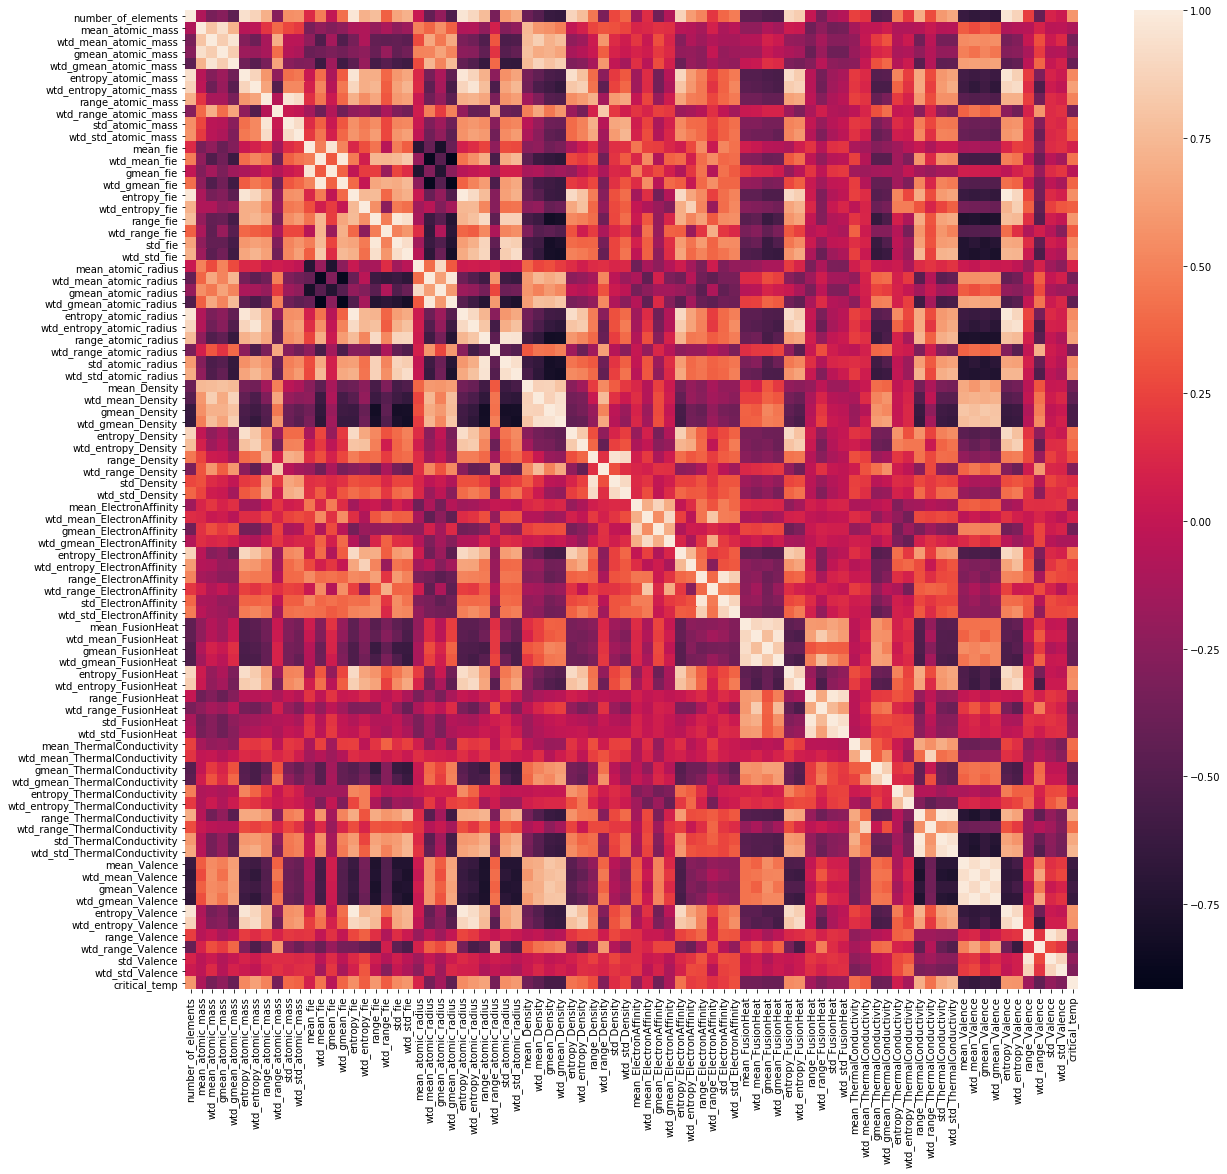

In [38]:
samp_all = train_org.sample(1000)
corr = samp_all.corr()

f, ax = plt.subplots(figsize=(20, 18))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [179]:
unique_org = unique

0         29.00
1         26.00
2         19.00
3         22.00
4         23.00
          ...  
21258      2.44
21259    122.10
21260      1.98
21261      1.84
21262     12.80
Name: critical_temp, Length: 21263, dtype: float64

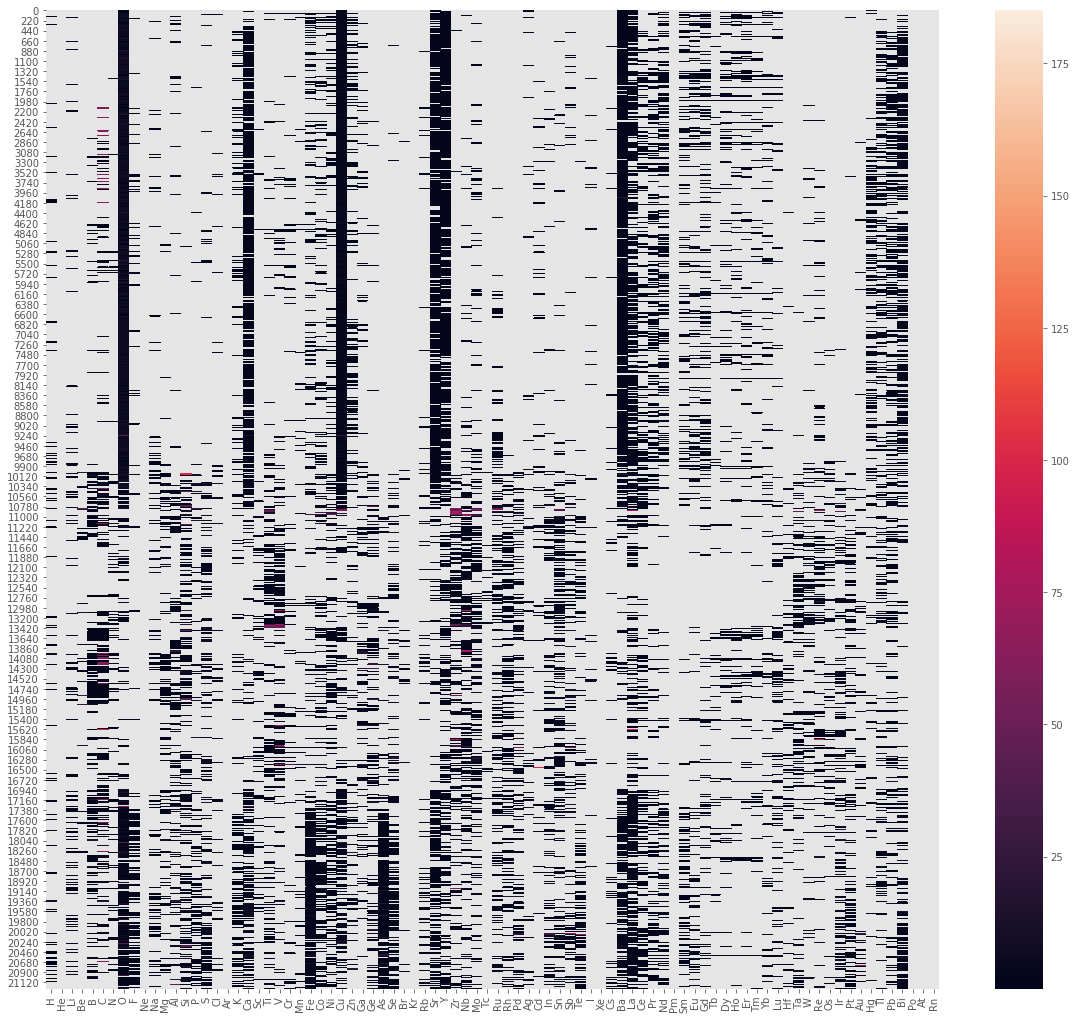

In [243]:
#unique_cp = unique
unique_cp.pop('critical_temp')
unique_cp[unique_cp==0.0]=np.nan

f, ax = plt.subplots(figsize=(20, 18))
ax = sns.heatmap(unique_cp)

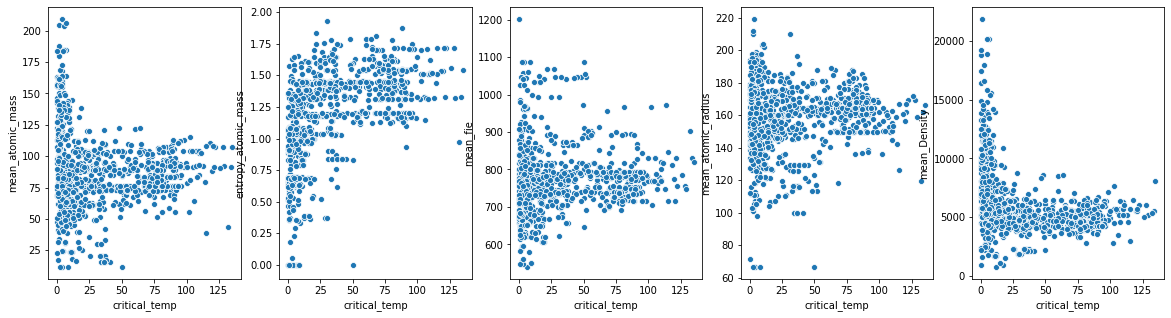

In [45]:
f, ax = plt.subplots(1,5,figsize=(20, 5))
sns.scatterplot(data=samp_all, x="critical_temp", y="mean_atomic_mass", ax=ax[0])
sns.scatterplot(data=samp_all, x="critical_temp", y="entropy_atomic_mass", ax=ax[1])
sns.scatterplot(data=samp_all, x="critical_temp", y="mean_fie", ax=ax[2])
sns.scatterplot(data=samp_all, x="critical_temp", y="mean_atomic_radius", ax=ax[3])
sns.scatterplot(data=samp_all, x="critical_temp", y="mean_Density", ax=ax[4])
plt.show()

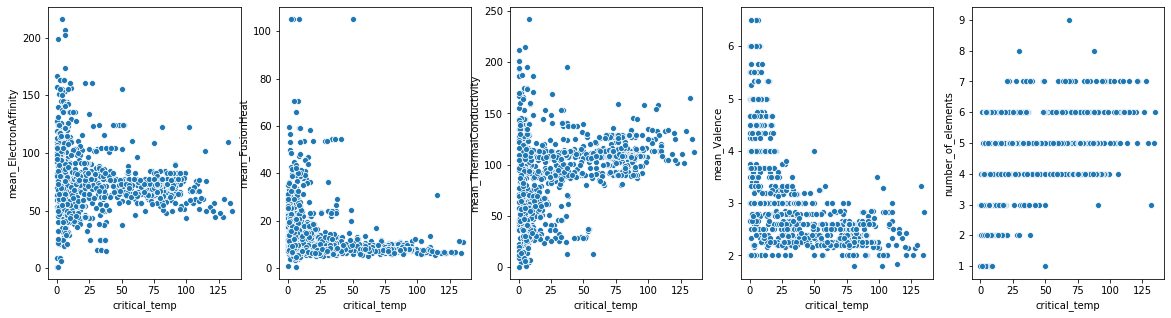

In [47]:
f, ax = plt.subplots(1,5,figsize=(20, 5))
sns.scatterplot(data=samp_all, x="critical_temp", y="mean_ElectronAffinity", ax=ax[0])
sns.scatterplot(data=samp_all, x="critical_temp", y="mean_FusionHeat", ax=ax[1])
sns.scatterplot(data=samp_all, x="critical_temp", y="mean_ThermalConductivity", ax=ax[2])
sns.scatterplot(data=samp_all, x="critical_temp", y="mean_Valence", ax=ax[3])
sns.scatterplot(data=samp_all, x="critical_temp", y="number_of_elements", ax=ax[4])
plt.show()

## Feature Importance <a name="fi"></a>

#### One way of evaluating feature importance is to use Pearson Correlation

Train (15947, 81) (15947,)
Test (5316, 81) (5316,)
Feature 0: 8965.159250
Feature 1: 226.780576
Feature 2: 1766.485571
Feature 3: 920.485751
Feature 4: 2559.725693
Feature 5: 6675.703361
Feature 6: 10293.744120
Feature 7: 4972.667552
Feature 8: 2073.579539
Feature 9: 2591.100842
Feature 10: 2307.741548
Feature 11: 179.273590
Feature 12: 3124.775127
Feature 13: 8.285677
Feature 14: 2232.051633
Feature 15: 7573.747341
Feature 16: 2788.546951
Feature 17: 9037.017920
Feature 18: 1626.450776
Feature 19: 6678.699232
Feature 20: 8246.428548
Feature 21: 167.764529
Feature 22: 1629.909683
Feature 23: 359.409177
Feature 24: 3245.301293
Feature 25: 7233.053168
Feature 26: 9118.521142
Feature 27: 11869.566375
Feature 28: 2210.800292
Feature 29: 7306.108744
Feature 30: 9002.599609
Feature 31: 2557.547213
Feature 32: 3761.252602
Feature 33: 6679.541391
Feature 34: 6630.181620
Feature 35: 4165.676027
Feature 36: 3001.640207
Feature 37: 1127.957480
Feature 38: 1407.911631
Feature 39: 203.646811
Featur

<BarContainer object of 81 artists>

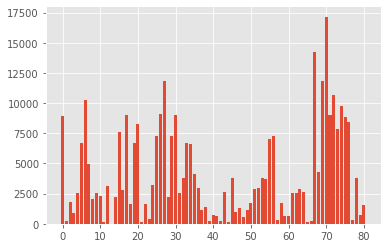

In [258]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
# Split
X_train, X_test, y_train, y_test = train_test_split(train, train_temp,
                                                    train_size=0.75, test_size=0.25)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

#### Another way of evaluating feature importance is to use Random Forest

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
forest = ExtraTreesRegressor()

forest.fit(train, train_temp)
importances = forest.feature_importances_

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

<Figure size 720x3240 with 0 Axes>

<BarContainer object of 81 artists>

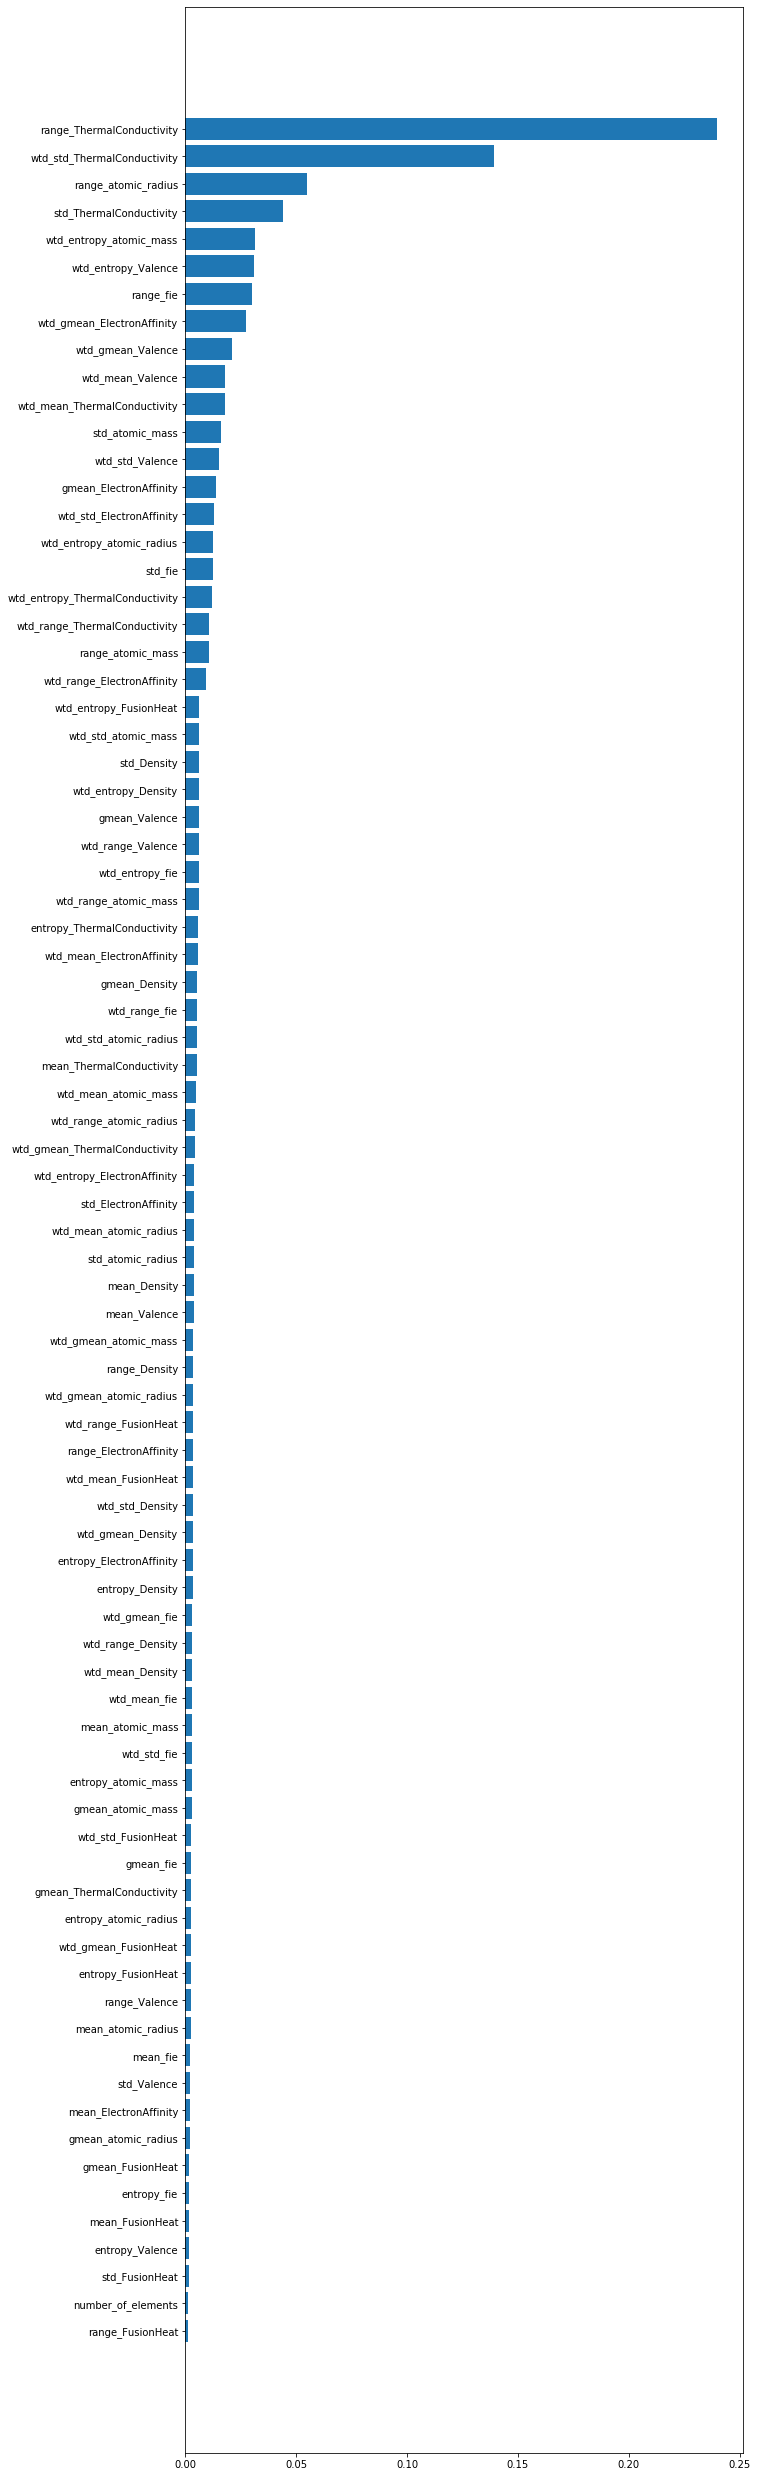

In [63]:
sorted_idx = forest.feature_importances_.argsort()

plt.figure(figsize=(10,45))
plt.barh(train.columns[sorted_idx], importances[sorted_idx])

#### We found a consistency on the important features identifies using the two methods.

<Figure size 720x3240 with 0 Axes>

<BarContainer object of 167 artists>

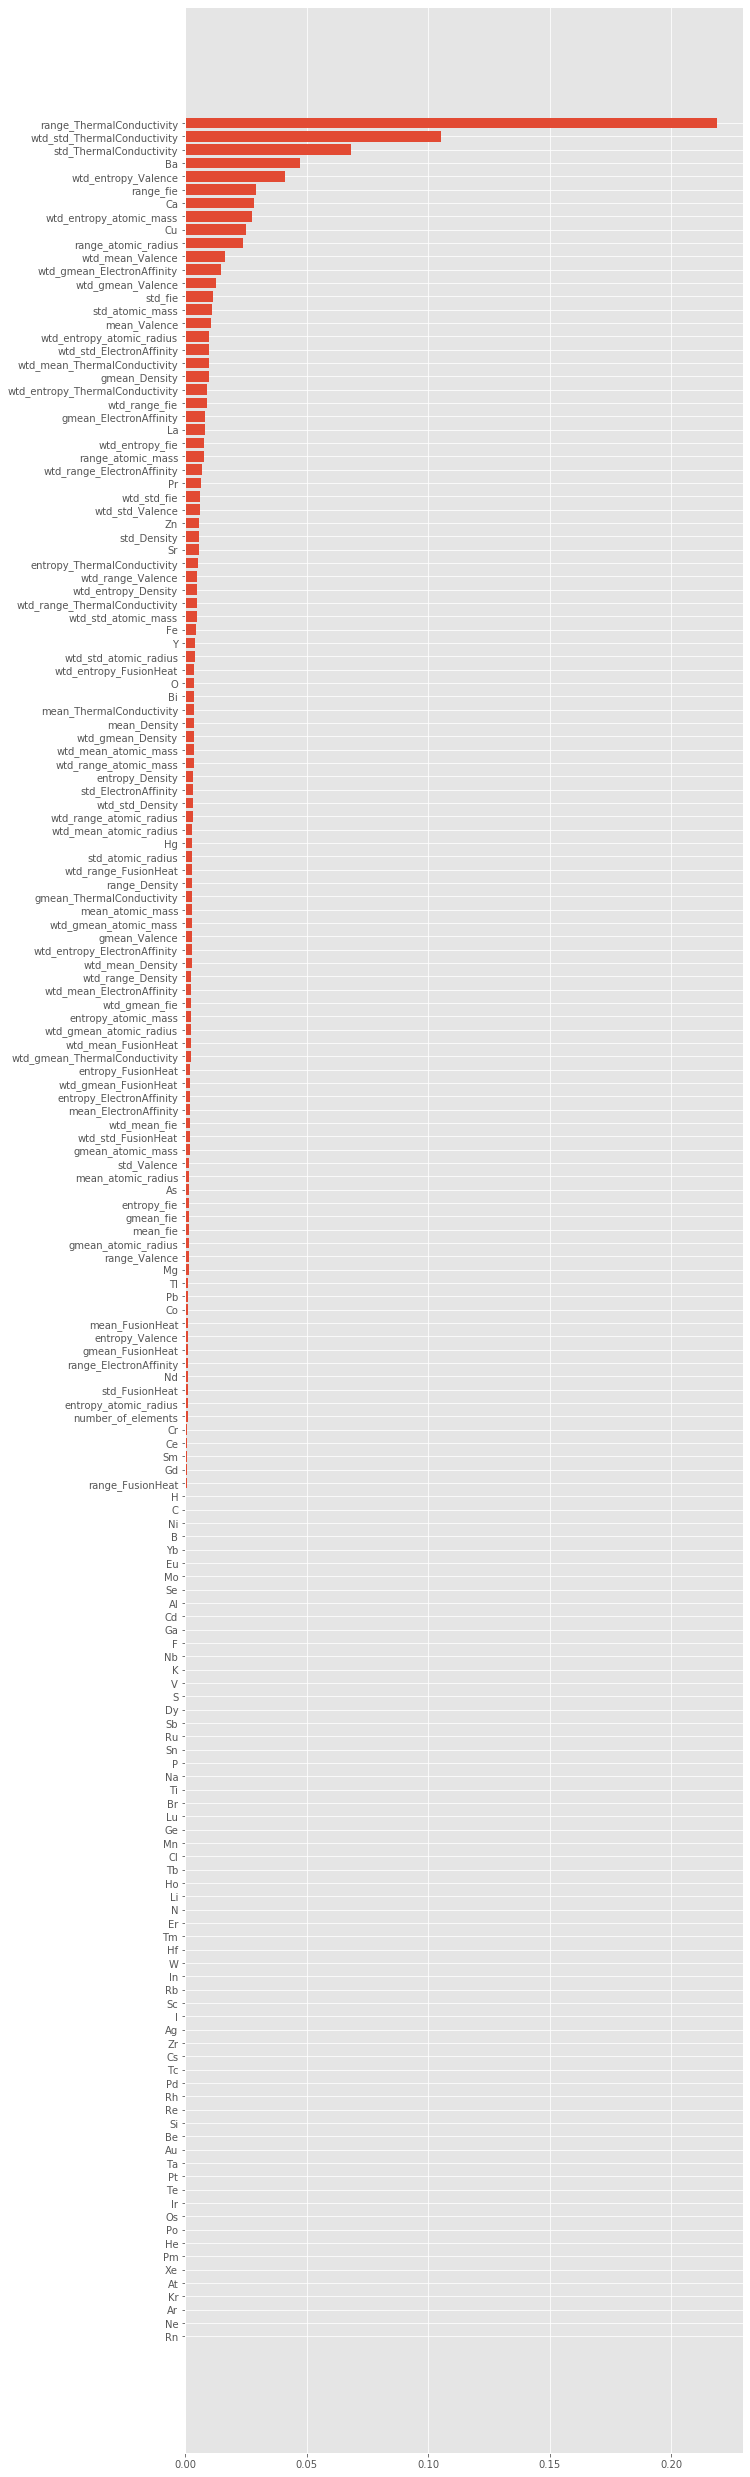

In [185]:
#Find feature importances with Combined File

forest.fit(comb, comb_temp)
importances = forest.feature_importances_
sorted_idx = forest.feature_importances_.argsort()

plt.figure(figsize=(10,45))
plt.barh(comb.columns[sorted_idx], importances[sorted_idx])

## Linear Regression  <a name="lr"></a>

#### First we set cross-validation procedue with error functions.

Without parameter tunning we get some intuition using different regressors.

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error
rfr = RandomForestRegressor()

scores = cross_val_score(rfr, train, train_temp, cv=3, scoring='neg_mean_absolute_error')
predictions = cross_val_predict(rfr, train, train_temp, cv=3)

#MAE
np.sqrt(mean_squared_error(train_temp, predictions))

14.09265231906404

In [67]:
from sklearn.linear_model import LinearRegression
rfr = LinearRegression()

scores = cross_val_score(rfr, train, train_temp, cv=3, scoring='neg_mean_absolute_error')
predictions = cross_val_predict(rfr, train, train_temp, cv=3)

#MAE
np.sqrt(mean_squared_error(train_temp, predictions))

19.42927391232238

#### Using linear regression get MAE of 19.42 lower than Rdandom forest algorithms

In [155]:
#Pick first 60 features
train_pick = train[train.columns[sorted_idx][:60]]

In [86]:
scores = cross_val_score(rfr, train_pick, train_temp, cv=3, scoring='neg_mean_absolute_error')
predictions = cross_val_predict(rfr, train_pick, train_temp, cv=3)

#MAE
np.sqrt(mean_squared_error(train_temp, predictions))

20.78566061324429

#### With just first 60 variables MAE drops just slightly from 19.4 to 20.78

### With Combined data:

In [186]:
rfr = RandomForestRegressor()

scores = cross_val_score(rfr, comb, comb_temp, cv=3, scoring='neg_mean_absolute_error')
predictions = cross_val_predict(rfr, comb, comb_temp, cv=3)

#MAE
np.sqrt(mean_squared_error(comb_temp, predictions))

13.747644563167565

In [280]:
rfr = LinearRegression()

scores = cross_val_score(rfr, comb, comb_temp, cv=3, scoring='neg_mean_absolute_error')
predictions = cross_val_predict(rfr, comb, comb_temp, cv=3)

#MAE
mean_absolute_error(comb_temp, predictions)
#np.sqrt(mean_squared_error(comb_temp, predictions))

15.687881595295615

In [281]:
rfr = Lasso(alpha=1)

scores = cross_val_score(rfr, comb, comb_temp, cv=3, scoring='neg_mean_absolute_error')
predictions = cross_val_predict(rfr, comb, comb_temp, cv=3)

#MAE
mean_absolute_error(comb_temp, predictions)
#np.sqrt(mean_squared_error(comb_temp, predictions))

14.86493225696916

In [282]:
rfr = Ridge(alpha=1)

scores = cross_val_score(rfr, comb, comb_temp, cv=3, scoring='neg_mean_absolute_error')
predictions = cross_val_predict(rfr, comb, comb_temp, cv=3)

#MAE
mean_absolute_error(comb_temp, predictions)
#np.sqrt(mean_squared_error(comb_temp, predictions))

15.708675302706157

In [283]:
rfr = Lasso(alpha=1)

comb_pick = comb[comb.columns[sorted_idx][:100]]
scores = cross_val_score(rfr, comb_pick, comb_temp, cv=3, scoring='neg_mean_absolute_error')
predictions = cross_val_predict(rfr, comb_pick, comb_temp, cv=3)

#MAE
np.sqrt(mean_squared_error(comb_temp, predictions))

24.829401537358812

#### For combined file, the random forest still get the minimized error. 

    - Using all features and linear regressor get a high error. Using Lasso can improve the error.
    - With a selected features (100) the error get larger.

#### Feature number vs error testing
The following shows the error measurements with different number of features included (>65).
It provides further evidence that using all features will contribute to a lower error.

In [272]:
# compare different numbers of features selected using mutual information
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# define number of features to evaluate
num_features = [i for i in range(X_train.shape[1]-19, X_train.shape[1]+1)]
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LinearRegression()
	fs = SelectKBest(score_func=mutual_info_regression, k=k)
	pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
	# evaluate the model
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

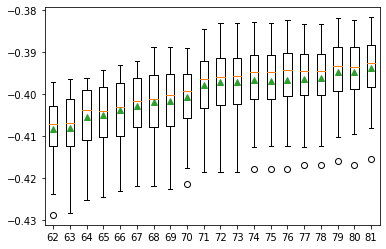

 ### Linear Model Hyperparameter Tuning

In [87]:
#Divide data into test and training splits
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.10, random_state=42)

In [88]:
#The below function reference to https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb
#Use mean absolute error (MAE) to score the regression models created 
#(the scale of MAE is identical to the response variable)
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

#Function for Root mean squared error
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

#Function for Mean Absolute Percentage Error (MAPE) - Untested
#Adapted from - https://stackoverflow.com/questions/42250958/how-to-optimize-mape-code-in-python
def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer
               }

In [89]:
from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    #cross val score sign-flips the outputs of MAE
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    scores['test_MAPE'] = scores['test_MAPE']
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean MAE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    return scoresResults

In [95]:
# Using ShuffleSplit for Training/Testing Split 
from sklearn.model_selection import ShuffleSplit


num_cv_iterations = 10
num_instances = len(train_temp)
cv_object_reg = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2,random_state=42)
                         
print(cv_object_reg)

ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None)


### Grid Search for linear regression

In [90]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression

class CappedLinearRegression(LinearRegression):

    def predict(self, X):
        return np.clip(super(CappedLinearRegression, self).predict(X), 0, 100)

In [91]:
#Create a Linear Regression object and perform a grid search to find the best parameters
linreg = CappedLinearRegression()
parameters = {'normalize':(True,False), 'fit_intercept':(True,False)}

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(train, train_temp)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.7s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.1, train_size=None),
             error_score=nan,
             estimator=CappedLinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': (True, False),
                         'normalize': (True, False)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [92]:
#Print the parameterization of the best estimator
regGridSearch.best_estimator_

CappedLinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                       normalize=False)

In [98]:
#Create CappedLinearRegression predictions between 0 and 100% using the best parameters for our Linear Regression object
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regEstimator, train_pick, train_temp, cv_object_reg)

The average MAE for all cv folds is: 			 13.838
The average MAE percentage (MAPE) for all cv folds is: 	 946.63
The average RMSE for all cv folds is: 			 18.446
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,13.618079,475.441848,18.102281
1,14.069114,292.741482,18.822021
2,13.846819,441.338504,18.331777
3,13.940004,1758.103055,18.662199
4,13.712891,1581.800412,18.253272
5,13.834028,891.174494,18.339403
6,13.829801,1368.190421,18.533071
7,14.060357,345.701437,18.812368
8,13.669747,778.402136,18.278306
9,13.796901,1533.386321,18.330199


In [168]:
#Create a regression estimator with best parameters for cross validation
regEstimator = CappedLinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,normalize=False)
#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, train, train_temp, cv_object_reg)

The average MAE for all cv folds is: 			 12.817
The average MAE percentage (MAPE) for all cv folds is: 	 1144.6
The average RMSE for all cv folds is: 			 17.436
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,12.638204,508.818570,17.070861
1,13.043641,488.508561,17.795394
2,12.745108,494.362071,17.233301
3,12.898320,2007.459337,17.659807
4,12.689755,1704.864249,17.237121
5,12.747599,1562.028421,17.161069
6,12.839838,1115.819660,17.580006
7,13.069792,1026.104396,17.967287
8,12.605151,1245.102040,17.243832
9,12.891171,1293.122749,17.415180


### Use Combine File

In [284]:
#Create a regression estimator with best parameters for cross validation
regEstimator = CappedLinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,normalize=False)
#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, comb, comb_temp, cv_object_reg)

The average MAE for all cv folds is: 			 12.039
The average MAE percentage (MAPE) for all cv folds is: 	 1258.5
The average RMSE for all cv folds is: 			 16.605
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,11.925437,589.876788,16.218158
1,12.215171,665.066647,16.945803
2,11.859240,740.742318,16.300816
3,12.127040,2610.643226,16.798872
4,12.005565,1599.263163,16.585679
5,11.920131,1682.604840,16.304644
6,12.133269,1084.832875,16.840449
7,12.188247,1192.408448,16.982418
8,11.930601,1295.972261,16.579554
9,12.085719,1123.861262,16.498027


### Grid Search for Lasso regression

In [277]:
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import Lasso

reg = Lasso(fit_intercept=True, normalize=True,copy_X=True
          , max_iter=10000, precompute=True, tol=0.0001, random_state=0)

#Test parameters 
alpha = [0.001, 0.1, 1, 10, 20]
selection = ['cyclic','random']
warm_start = [True, False]
parameters = {'alpha': alpha, 'selection': selection, 'warm_start': warm_start}

In [164]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
from sklearn.model_selection import RandomizedSearchCV
regGridSearch = RandomizedSearchCV(estimator = reg, param_distributions = parameters, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
regGridSearch.fit(train_pick, train_temp)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.9s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=10000, normalize=True,
                                   positive=False, precompute=True,
                                   random_state=0, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.001, 0.1, 1, 10, 20],
                                        'selection': ['cyclic', 'random'],
                                        'warm_start': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [165]:
#Print the parameterization of the best estimator
regGridSearch.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=True, positive=False, precompute=True, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=True)

In [100]:
EvaluateRegressionEstimator(regGridSearch.best_estimator_, train_pick, train_temp, cv_object_reg)

The average MAE for all cv folds is: 			 15.668
The average MAE percentage (MAPE) for all cv folds is: 	 1827.3
The average RMSE for all cv folds is: 			 20.006
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,15.301759,688.505832,19.463887
1,15.816168,1190.709697,20.390400
2,15.657382,1023.353674,19.905548
3,15.845568,2336.857770,20.201027
4,15.524870,2503.542127,19.790010
5,15.721692,2206.921747,19.892988
6,15.831215,2199.746492,20.251550
7,15.892202,1403.508445,20.412923
8,15.527909,2511.564133,19.888836
9,15.561187,2207.911024,19.865464


In [166]:
EvaluateRegressionEstimator(regGridSearch.best_estimator_, train, train_temp, cv_object_reg)

The average MAE for all cv folds is: 			 14.313
The average MAE percentage (MAPE) for all cv folds is: 	 1301.7
The average RMSE for all cv folds is: 			 18.77
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,13.988499,1186.909091,18.311549
1,14.596613,1182.457108,19.193536
2,14.399134,1229.160316,18.710226
3,14.473854,1526.566873,19.019762
4,14.094719,1495.683366,18.492579
5,14.291282,1197.637584,18.525323
6,14.412192,1736.482641,18.976726
7,14.559080,670.711017,19.252273
8,14.086951,1285.676557,18.598165
9,14.224653,1505.444594,18.622840


#### For combined File

In [278]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
from sklearn.model_selection import RandomizedSearchCV
regGridSearch = RandomizedSearchCV(estimator = reg, param_distributions = parameters, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
regGridSearch.fit(comb, comb_temp)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=10000, normalize=True,
                                   positive=False, precompute=True,
                                   random_state=0, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.001, 0.1, 1, 10, 20],
                                        'selection': ['cyclic', 'random'],
                                        'warm_start': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [279]:
regGridSearch.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=True, positive=False, precompute=True, random_state=0,
      selection='random', tol=0.0001, warm_start=True)

In [263]:
regEstimator = Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=True, positive=False, precompute=True, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=True)

EvaluateRegressionEstimator(regEstimator, comb, comb_temp, cv_object_reg)

The average MAE for all cv folds is: 			 13.104
The average MAE percentage (MAPE) for all cv folds is: 	 1376.9
The average RMSE for all cv folds is: 			 20.892
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,12.659497,910.258629,16.961210
1,13.150310,1276.107286,17.926880
2,13.311297,1086.908462,32.020059
3,13.457461,1815.188546,27.000648
4,13.000770,1504.915942,17.696164
5,12.899136,1416.530268,17.270412
6,13.095976,1480.989054,17.792311
7,13.541369,1045.562721,26.983214
8,12.950163,1775.573245,17.721928
9,12.977661,1456.746902,17.543059


### Grid Search for Ridge regression

In [101]:
%%time
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import Ridge

reg = Ridge(fit_intercept=True, normalize=True,copy_X=True
          , max_iter=1000, tol=0.0001, random_state=0)

#Test parameters 
alpha = [0.001, 0.1, 1, 5, 10, 20]
solver = [ 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
parameters = {'alpha': alpha, 'solver': solver}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(train_pick, train_temp)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   43.3s


Wall time: 55.5 s


[Parallel(n_jobs=8)]: Done 360 out of 360 | elapsed:   55.3s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.1, train_size=None),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, random_state=0,
                             solver='auto', tol=0.0001),
             iid='deprecated', n_jobs=8,
             param_grid={'alpha': [0.001, 0.1, 1, 5, 10, 20],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [102]:
#Display the best estimator parameters
regGridSearch.best_estimator_

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, random_state=0, solver='cholesky', tol=0.0001)

In [103]:
#Create a regression estimator with best parameters for cross validation
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, train_pick, train_temp, cv_object_reg)

The average MAE for all cv folds is: 			 14.859
The average MAE percentage (MAPE) for all cv folds is: 	 1866.8
The average RMSE for all cv folds is: 			 19.116
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,14.644506,771.514900,18.790455
1,14.978238,1160.408428,19.423658
2,14.866942,1035.266558,18.993978
3,15.002569,2668.034638,19.312054
4,14.634240,2684.807547,18.848731
5,14.899289,2354.393126,19.015240
6,14.956187,1726.455681,19.282675
7,15.101135,1787.563382,19.497445
8,14.731638,2375.017222,19.013217
9,14.774874,2104.547294,18.987398


In [167]:
#Create a regression estimator with best parameters for cross validation
regEstimator = Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True, random_state=0, solver='cholesky', tol=0.0001)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, train, train_temp, cv_object_reg)

The average MAE for all cv folds is: 			 13.468
The average MAE percentage (MAPE) for all cv folds is: 	 1268.2
The average RMSE for all cv folds is: 			 17.828
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,13.262077,729.216540,17.468654
1,13.641024,555.057902,18.134544
2,13.459279,670.359265,17.677355
3,13.599341,2182.536526,18.083516
4,13.273518,1726.348193,17.584503
5,13.381739,1595.897859,17.525054
6,13.518131,1363.932339,17.983759
7,13.759896,1094.265386,18.391377
8,13.267813,1389.377690,17.657147
9,13.512818,1374.904868,17.776746


#### For combined File

In [262]:
regEstimator = Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, random_state=0, solver='cholesky', tol=0.0001)

EvaluateRegressionEstimator(regEstimator, comb, comb_temp, cv_object_reg)

The average MAE for all cv folds is: 			 12.637
The average MAE percentage (MAPE) for all cv folds is: 	 1232.7
The average RMSE for all cv folds is: 			 21.175
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,12.372527,557.854832,16.507942
1,12.619166,467.732017,17.197468
2,12.896900,624.986435,37.015190
3,12.930162,2513.033616,27.975464
4,12.483963,1542.281937,16.912269
5,12.371988,1634.640927,16.557654
6,12.560881,1274.936704,17.097854
7,13.168894,1267.304656,28.735140
8,12.410149,1314.092648,16.899154
9,12.559225,1130.026736,16.848202


### Grid Search for Elastic Net

In [245]:
%%time
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import ElasticNet

reg = ElasticNet(fit_intercept=True, normalize=True, precompute=True, copy_X=True
          , max_iter=10000, tol=0.0001, random_state=0)
 
#Test parameters
l1_ratio = [0.001, 0.01, 0.1, 0.5, 0.75, 1]
alpha = [0.001, 0.1, 1, 10]
selection = ['cyclic','random']
warm_start = [True, False]
parameters = {'l1_ratio': l1_ratio, 'alpha': alpha, 'selection': selection, 'warm_start': warm_start}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(train_pick, train_temp)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   10.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   15.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   24.8s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   37.0s


Wall time: 43.2 s


[Parallel(n_jobs=8)]: Done 960 out of 960 | elapsed:   43.0s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.1, train_size=None),
             error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=10000, normalize=True,
                                  positive=False, precompute=True,
                                  random_state=0, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=8,
             param_grid={'alpha': [0.001, 0.1, 1, 10],
                         'l1_ratio': [0.001, 0.01, 0.1, 0.5, 0.75, 1],
                         'selection': ['cyclic', 'random'],
                         'warm_start': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [246]:
regGridSearch.best_estimator_

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=10000, normalize=True, positive=False, precompute=True,
           random_state=0, selection='random', tol=0.0001, warm_start=True)

In [170]:
#Create a regression estimator with best parameters for cross validation
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, train_pick, train_temp, cv_object_reg)

The average MAE for all cv folds is: 			 15.669
The average MAE percentage (MAPE) for all cv folds is: 	 1828.0
The average RMSE for all cv folds is: 			 20.007
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,15.303968,689.484178,19.465710
1,15.818381,1193.340171,20.391634
2,15.660030,1025.220555,19.907761
3,15.844754,2340.364639,20.201490
4,15.526896,2500.800625,19.791752
5,15.724152,2207.057285,19.894959
6,15.830272,2202.130629,20.250979
7,15.890675,1403.318555,20.411823
8,15.529033,2511.235026,19.890412
9,15.561411,2206.955709,19.865784


#### For combined File

In [261]:
regEstimator = ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=10000, normalize=True, positive=False, precompute=True,
           random_state=0, selection='random', tol=0.0001, warm_start=True)

EvaluateRegressionEstimator(regEstimator, comb, comb_temp, cv_object_reg)

The average MAE for all cv folds is: 			 13.104
The average MAE percentage (MAPE) for all cv folds is: 	 1379.9
The average RMSE for all cv folds is: 			 20.89
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,12.659192,908.811779,16.960736
1,13.150393,1275.382379,17.926957
2,13.311069,1086.284893,32.009139
3,13.456885,1819.993484,26.996613
4,13.000404,1509.162125,17.696187
5,12.899240,1424.609791,17.270641
6,13.096128,1481.259558,17.792159
7,13.541646,1053.164651,26.981273
8,12.950499,1782.373207,17.722451
9,12.977548,1457.502060,17.543183


## Non-linear Model Regression  <a name="nlr"></a>

### Grid Search for Random Forest regression

In [148]:
%%time
#Create a Linear Regression object and perform a grid search to find the best parameters
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
parameters = {'bootstrap': [True, False],
               'max_depth': [10, 50, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 10],
               'n_estimators': [130, 230]}

Wall time: 0 ns


### The following job runs for 5 hours!

In [149]:
from sklearn.model_selection import RandomizedSearchCV
regGridSearch = RandomizedSearchCV(estimator = reg, param_distributions = parameters, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
regGridSearch.fit(train_pick, train_temp)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 65.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 157.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [150]:
#Display the best estimator parameters
regGridSearch.best_estimator_

# RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
#                       max_depth=100, max_features='sqrt', max_leaf_nodes=None,
#                       max_samples=None, min_impurity_decrease=0.0,
#                       min_impurity_split=None, min_samples_leaf=2,
#                       min_samples_split=2, min_weight_fraction_leaf=0.0,
#                       n_estimators=230, n_jobs=None, oob_score=False,
#                       random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=230, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [151]:
%%time
from sklearn.ensemble import RandomForestRegressor

#regEstimator = regGridSearch.best_estimator_
regEstimator = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regEstimator, train_pick, train_temp, cv_object_reg)

The average MAE for all cv folds is: 			 5.1199
The average MAE percentage (MAPE) for all cv folds is: 	 365.36
The average RMSE for all cv folds is: 			 9.459
*********************************************************
Cross Validation Fold Mean Error Scores
Wall time: 8min 14s


,MAE,MAPE,RMSE
0,4.958598,105.734765,8.924783
1,5.204995,86.729689,9.870779
2,5.027679,100.050361,9.154367
3,5.235597,1124.816389,9.860564
4,5.097234,325.140226,9.198009
5,5.073020,339.035575,9.096265
6,5.103980,677.007143,9.736748
7,5.208175,119.468629,9.852535
8,5.044905,434.790177,9.263249
9,5.245042,340.797577,9.632291


In [152]:
# regEstimator = regGridSearch.best_estimator_

# #Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
# EvaluateRegressionEstimator(regEstimator, train_pick, train_temp, cv_object_reg)

The average MAE for all cv folds is: 			 5.4211
The average MAE percentage (MAPE) for all cv folds is: 	 412.96
The average RMSE for all cv folds is: 			 9.6156
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,5.286055,137.152444,9.116294
1,5.516764,119.420316,10.063861
2,5.327566,115.949707,9.319199
3,5.552263,1235.982378,10.066171
4,5.387234,381.943379,9.235285
5,5.339136,395.962713,9.184022
6,5.418620,680.161394,9.919589
7,5.514771,170.049124,10.041544
8,5.328140,512.104653,9.457625
9,5.540292,380.889609,9.752039


In [153]:
#Use Random Forest and use ALL variables

regEstimator = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regEstimator, train, train_temp, cv_object_reg)

The average MAE for all cv folds is: 			 5.0289
The average MAE percentage (MAPE) for all cv folds is: 	 365.92
The average RMSE for all cv folds is: 			 9.3078
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,4.904970,116.844444,8.887534
1,5.123705,94.917808,9.739983
2,4.934292,101.966175,8.930553
3,5.097813,1150.245779,9.629942
4,4.984826,325.679173,9.043485
5,4.980277,317.752332,8.997897
6,5.019526,671.224567,9.589125
7,5.181975,115.264585,9.781227
8,4.912096,434.633075,9.037182
9,5.149416,330.695498,9.441482


### Random Forest give the lowest RMSE so far!


#### Addition: Using PCA inputs for ExtraTrees Regression

Cumulative Explained variance at 30 components: 0.9933204817515267


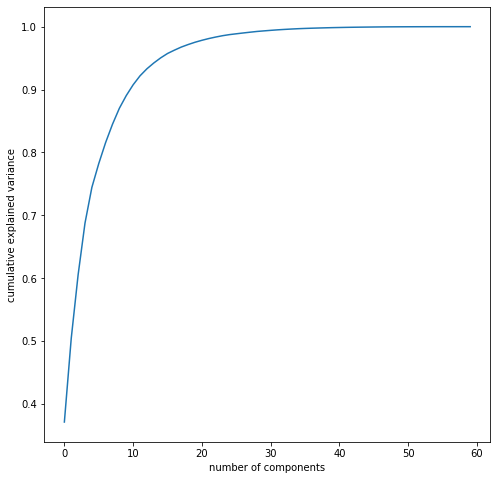

In [110]:
from sklearn.preprocessing import StandardScaler
# Scale the data 
ss = StandardScaler()

train_pick_scal = ss.fit_transform(train_pick)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_pca(X):
    # Perform PCA on the data to reduce the number of initial features 
    # and to remove correlations that are common between pixel features 
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)

    # Inspect the explained variances to determine how many components to use  
    plt.subplots(figsize=(8, 8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    print('Cumulative Explained variance at 30 components:',sum(pca.explained_variance_ratio_[0:30]) )
    
plot_pca(train_pick_scal)

In [111]:
# Convert X_sm to 200 principal components
pca = PCA(n_components=30)
train_pick_scal_pca30 = pca.fit_transform(train_pick_scal)

In [114]:
regEstimator = CappedLinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                       normalize=False)

In [115]:
#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regEstimator, train_pick_scal_pca30, train_temp, cv_object_reg)

The average MAE for all cv folds is: 			 15.182
The average MAE percentage (MAPE) for all cv folds is: 	 1049.1
The average RMSE for all cv folds is: 			 19.891
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,14.803446,460.217884,19.353126
1,15.428232,317.181631,20.324649
2,15.245185,463.664590,19.828686
3,15.313433,1597.820304,20.028289
4,15.018656,1380.527443,19.670592
5,15.220399,1264.259926,19.781301
6,15.333522,2154.781109,20.108451
7,15.366043,310.451423,20.292736
8,15.064062,1216.251654,19.789785
9,15.023779,1325.406054,19.736906


Cumulative Explained variance at 30 components: 0.9800374894721925


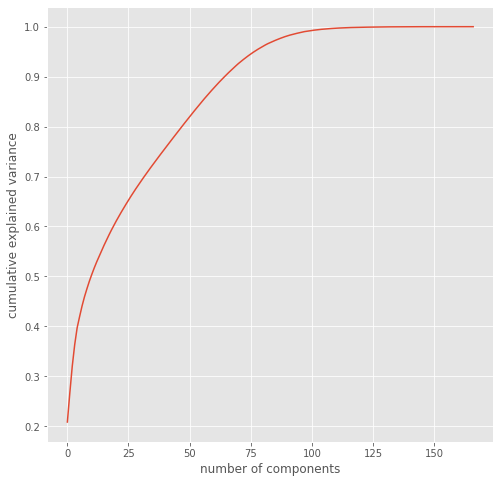

In [206]:
from sklearn.preprocessing import StandardScaler
# Scale the data 
ss = StandardScaler()

comb_scal = ss.fit_transform(comb)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_pca(X):
    # Perform PCA on the data to reduce the number of initial features 
    # and to remove correlations that are common between pixel features 
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)

    # Inspect the explained variances to determine how many components to use  
    plt.subplots(figsize=(8, 8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    print('Cumulative Explained variance at 90 components:',sum(pca.explained_variance_ratio_[0:90]) )
    
plot_pca(comb_scal)

In [209]:
# Convert X_sm to 200 principal components
pca = PCA(n_components=90)
comb_scale_pca90 = pca.fit_transform(comb_scal)
#regEstimator = CappedLinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
#                       normalize=False)

regEstimator = Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=True, positive=False, precompute=True, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=True)

EvaluateRegressionEstimator(regEstimator, comb_scale_pca90, comb_temp, cv_object_reg)

The average MAE for all cv folds is: 			 14.169
The average MAE percentage (MAPE) for all cv folds is: 	 1883.6
The average RMSE for all cv folds is: 			 19.146
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,13.782091,780.040792,18.243646
1,14.249594,1314.778474,19.137579
2,14.071531,1029.604199,20.441719
3,14.411550,2046.415744,19.323895
4,14.056386,2373.127838,18.948825
5,14.139498,2420.647270,18.717435
6,14.223211,2044.160354,19.076369
7,14.391924,1830.331851,19.522795
8,14.170780,2831.870138,19.178589
9,14.190478,2165.262165,18.866947


### Using PCA components (first 90) doesn't improve the errors

## Final Model  <a name="final"></a>

#### Below we show the best linear and non-linear models.
    - Linear with Ridge regularization
    - Non-linear with Random Forest

In [285]:
# Ridge apply to X with all variables
clfa=CappedLinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,normalize=False)
clfa.fit(comb,comb_temp)
y_pred=clfa.predict(comb)


CappedLinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                       normalize=False)

Text(0.5, 0, 'True value Tc')

Text(0, 0.5, 'Predictions')

0.7710703381513878

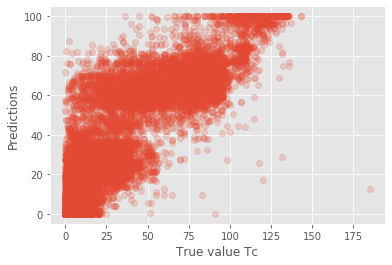

In [288]:
#y_hat_train = forest.predict(X_train)
plt.plot(comb_temp, y_pred, marker = "o", linestyle="",
             alpha=0.2)
plt.xlabel('True value Tc')
plt.ylabel('Predictions');

from sklearn.metrics import r2_score
r2_score(comb_temp, y_pred)

In [268]:
# Random Forest apply to X with all variables
from sklearn.ensemble import RandomForestRegressor
clfa=RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
clfa.fit(comb,comb_temp)
y_pred=clfa.predict(comb)


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Text(0.5, 0, 'True value Tc')

Text(0, 0.5, 'Predictions')

0.9831405393179657

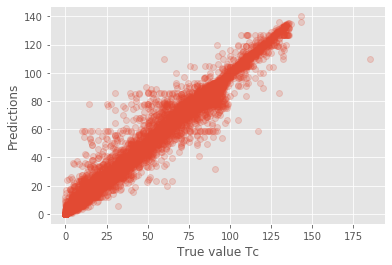

In [269]:
#y_hat_train = forest.predict(X_train)
plt.plot(comb_temp, y_pred, marker = "o", linestyle="",
             alpha=0.2)
plt.xlabel('True value Tc')
plt.ylabel('Predictions');

from sklearn.metrics import r2_score
r2_score(comb_temp, y_pred)